In [1]:
import collections
import numpy as np

17 городов, 25 соединяющих дорог

In [22]:
roads = [
    ("Moscow", "Tver", 5),
    ("Tver", "Saint-Petersburg", 11),
    ("Saint-Petersburg", "Velikiy Novgorod", 5),
    ("Velikiy Novgorod", "Tver", 7),
    ("Moscow", "Ryazan", 5),
    ("Moscow", "Nizhniy Novgorod", 10),
    ("Penza", "Ryazan", 8),
    ("Cheboksary", "Nizhniy Novgorod", 5),
    ("Penza", "Samara", 9),
    ("Samara", "Kazan", 9),
    ("Yoshkar-Ola", "Nizhniy Novgorod", 5),
    ("Yoshkar-Ola", "Kazan", 6),
    ("Cheboksary", "Kazan", 4),
    ("Yoshkar-Ola", "Cheboksary", 2),
    ("Samara", "Orenburg", 8),
    ("Kazan", "Orenburg", 14),
    ("Kazan", "Perm", 13),
    ("Kazan", "Naberezhnye Chelny", 5),
    ("Perm", "Naberezhnye Chelny", 10),
    ("Orenburg", "Naberezhnye Chelny", 10),
    ("Orenburg", "Ufa", 7),
    ("Ufa", "Naberezhnye Chelny", 6),
    ("Ufa", "Chelyabinsk", 8),
    ("Perm", "Ekaterinburg", 8),
    ("Chelyabinsk", "Ekaterinburg", 4)
]

In [23]:
location_tuples = [
    ("Moscow", 55.7558, 37.6173),
    ("Saint-Petersburg", 59.9343, 30.3351),
    ("Tver", 56.8597,35.7493),
    ("Velikiy Novgorod", 58.5228,31.2718),
    ("Ryazan", 54.6053,39.7157),
    ("Penza", 53.2253,44.9985),
    ("Nizhniy Novgorod", 56.2850,43.9086),
    ("Yoshkar-Ola", 56.6354,47.8856),
    ("Cheboksary", 56.1139,47.2563),
    ("Kazan", 55.8094,49.0747),
    ("Samara", 53.2383,50.2227),
    ("Orenburg", 51.7646,55.0979),
    ("Naberezhnye Chelny", 55.7204,52.3944),
    ("Perm", 58.0205, 55.9540),
    ("Ekaterinburg", 56.8139,60.3747),
    ("Chelyabinsk", 55.1523,61.1283),
    ("Ufa", 54.8088,55.7406),
]

In [24]:
locs = [c[0] for c in location_tuples]
ttime = [t[2] for t in roads]

In [25]:
# dict{location name: index}
loc_name = {k:v for k, v in enumerate(locs)}
loc_name

{0: 'Moscow',
 1: 'Saint-Petersburg',
 2: 'Tver',
 3: 'Velikiy Novgorod',
 4: 'Ryazan',
 5: 'Penza',
 6: 'Nizhniy Novgorod',
 7: 'Yoshkar-Ola',
 8: 'Cheboksary',
 9: 'Kazan',
 10: 'Samara',
 11: 'Orenburg',
 12: 'Naberezhnye Chelny',
 13: 'Perm',
 14: 'Ekaterinburg',
 15: 'Chelyabinsk',
 16: 'Ufa'}

In [26]:
matr = np.zeros((len(location_tuples), len(location_tuples)))
matr.shape

(17, 17)

In [27]:
for i in range(len(matr)):
    for j in range(len(matr)):
        for l in roads:
            if l[0] == loc_name[i] and l[1] == loc_name[j]:
                matr[i][j] = l[2]
                matr[j][i] = l[2]
print(matr)

[[  0.   0.   5.   0.   5.   0.  10.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.]
 [  0.   0.  11.   5.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.]
 [  5.  11.   0.   7.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.]
 [  0.   5.   7.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.]
 [  5.   0.   0.   0.   0.   8.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.]
 [  0.   0.   0.   0.   8.   0.   0.   0.   0.   0.   9.   0.   0.   0.
    0.   0.   0.]
 [ 10.   0.   0.   0.   0.   0.   0.   5.   5.   0.   0.   0.   0.   0.
    0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   5.   0.   2.   6.   0.   0.   0.   0.
    0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   5.   2.   0.   4.   0.   0.   0.   0.
    0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   6.   4.   0.   9.  14.   5.  13.
    0.   0.   0.]
 [  0.   0.   0.   0.   0.   9.   0.   0.   0.   9.   0.   8.   0.   0.
    0.   0.   0.]
 [  0.   0

In [28]:
G = collections.defaultdict(dict)
for i, line in enumerate(matr):
    for j, elem in enumerate(line):
        if elem != 0:
            G[loc_name[i]][loc_name[j]] = elem
G

defaultdict(dict,
            {'Cheboksary': {'Kazan': 4.0,
              'Nizhniy Novgorod': 5.0,
              'Yoshkar-Ola': 2.0},
             'Chelyabinsk': {'Ekaterinburg': 4.0, 'Ufa': 8.0},
             'Ekaterinburg': {'Chelyabinsk': 4.0, 'Perm': 8.0},
             'Kazan': {'Cheboksary': 4.0,
              'Naberezhnye Chelny': 5.0,
              'Orenburg': 14.0,
              'Perm': 13.0,
              'Samara': 9.0,
              'Yoshkar-Ola': 6.0},
             'Moscow': {'Nizhniy Novgorod': 10.0, 'Ryazan': 5.0, 'Tver': 5.0},
             'Naberezhnye Chelny': {'Kazan': 5.0,
              'Orenburg': 10.0,
              'Perm': 10.0,
              'Ufa': 6.0},
             'Nizhniy Novgorod': {'Cheboksary': 5.0,
              'Moscow': 10.0,
              'Yoshkar-Ola': 5.0},
             'Orenburg': {'Kazan': 14.0,
              'Naberezhnye Chelny': 10.0,
              'Samara': 8.0,
              'Ufa': 7.0},
             'Penza': {'Ryazan': 8.0, 'Samara': 9.0},
     

In [75]:
def dijkstra(G, current_point, end_point, visited_points, p, b, s):
    for neigh in G[current_point]:
        xm = p[current_point] + G[current_point][neigh]
        if neigh not in p:
            p[neigh] = G[current_point][neigh]
            b[neigh] = current_point
        
        elif neigh not in visited_points:
            if p[neigh] > xm:
                p[neigh] = xm
                b[neigh] = current_point

    visited_points.append(current_point)

    if len(G) <= len(visited_points):
        s.insert(0, end_point)

        while True:
            if b[end_point] == -1:
                break

            end_point = b[end_point]
            s.insert(0, end_point)

        return s

    for d in p:
        if d not in visited_points:
            dm = p[d]
            break

    for y in p:
        if p[y] < dm and not y in visited_points:
            dm = p[y]
            d = y
    current_point = d

    dijkstra(G, current_point, end_point, visited_points, p, b, s)

In [77]:
current_point, end_point, p, b, visited_points = start_v('Nizhniy Novgorod', 'Kazan')
s = []
dijkstra(G, current_point, end_point, visited_points, p, b, s)
s

['Nizhniy Novgorod', 'Yoshkar-Ola', 'Kazan']

In [13]:
names = [
    [
        'Alexander',
        'Alexei',
        'Anatoly',
        'Artyom',
        'Bator',
        'Boris',
        'Vadim',
        'Valeriy',
        'Vladislav',
        'Grigoriy',
        'Daniil',
        'Denis',
        'Dmitrii',
        'Evgeniy',
        'Egor',
        'Ivan',
        'Ilya',
        'Kirill',
        'Konstantin',
        'Maxim',
        'Michail',
        'Nikita',
        'Nikolay',
        'Oleg',
        'Pavel',
        'Petr',
        'Roman',
        'Ruslan',
        'Sergey',
        'Stanislav',
        'Timur',
        'Tsyden',
        'Yury'
    ],
    [
        'Alexandra',
        'Anastasiya',
        'Anna',
        'Valentina',
        'Viktoriia',
        'Galina',
        'Diana',
        'Ekaterina',
        'Elena',
        'Erzhena',
        'Evgeniya',
        'Zhanna',
        'Irina',
        'Kseniya',
        'Kristina',
        'Larisa',
        'Lubov',
        'Ludmila',
        'Margarita',
        'Marina',
        'Mariya',
        'Nadezhda',
        'Natalya',
        'Oksana',
        'Olga',
        'Polina',
        'Svetlana',
        'Tatyana',
        'Yulia',
        'Yana'
    ]
]

surname = [
    'Abakumov',
    'Abramov',
    'Averin',
    'Agafonov',
    'Azarov',
    'Alexeyev',
    'Andreev',
    'Anisimov',
    'Anosov',
    'Antipov',
    'Arshavin',
    'Astakhov',
    'Babichev',
    'Babykin',
    'Barinov',
    'Bazhenov',
    'Bazarov',
    'Balakin',
    'Beloysov',
    'Vavilov',
    'Vasnetsov',
    'Vakhrushev',
    'Vetrov',
    'Voloshin',
    'Vorontsov',
    'Gavrilov',
    'Gagarin',
    'Gorbunov',
    'Grigoryev',
    'Davydov',
    'Derzhavin',
    'Dmitriev',
    'Yelizarov',
    'Yeltsov',
    'Yermakov',
    'Yermolaev',
    'Zhdanov',
    'Zhilin',
    'Zaytsev',
    'Ivanov',
    'Izmaylov',
    'Ilyin',
    'Kalashnokov',
    'Kalugin',
    'Kupriyanov',
    'Kirillov',
    'Klimov',
    'Kozakov',
    'Kuzmin',
    'Komarov',
    'Krivov',
    'Kurbatov',
    'Lavrentyev',
    'Lavrov',
    'Lebedev',
    'Levin',
    'Lisov',
    'Limonov',
    'Lomonosov',
    'Maksinov',
    'Mamonov',
    'Marinin',
    'Marinov',
    'Markin',
    'Matveev',
    'Medvedev',
    'Migunov',
    'Minayev',
    'Molchanov',
    'Nazarov',
    'Nikitin',
    'Nosov',
    'Ozerov',
    'Orlov',
    'Osminin',
    'Panov',
    'Pelevin',
    'Perevalov',
    'Pogodin',
    'Popov',
    'Repin',
    'Rasputin',
    'Pozhkov',
    'Rodin',
    'Ryabkin',
    'Ryabov',
    'Savrasov',
    'Samarin',
    'Samoylov',
    'Samsonov',
    'Semyonov',
    'Senkin',
    'Suvorov'
]

In [14]:
G['Moscow']['Tver'], G['Tver']['Moscow']

(5.0, 5.0)

In [48]:
def get_time_and_price(route):
    
    data = [collections.defaultdict(dict) for i in range(len(route) - 1)]
    center_index = route.index(get_center(G, route))
    i = 0
    for s in route[:center_index]:
        for s2 in route[:center_index:-1]:
            dest = s+'_'+s2
            data[i][dest] = get_route_duration(s, s2)
            i+=1
    return data

In [18]:
route = ['Moscow', 'Ryazan', 'Penza', 'Samara', 'Orenburg']
data = get_time_and_price(route)
data

[defaultdict(dict, {'Moscow_Orenburg': 30.0}),
 defaultdict(dict, {'Moscow_Samara': 22.0}),
 defaultdict(dict, {'Ryazan_Orenburg': 25.0}),
 defaultdict(dict, {'Ryazan_Samara': 17.0})]

In [19]:
get_route_duration('Moscow', 'Penza')

13.0

In [213]:
a = [[1991.0, 30.0], [2348.0, 30.0], [2386.0, 30.0], [2328.0, 30.0], [1874.0, 22.0], [2036.0, 25.0], [2363.0, 25.0], [1659.0, 25.0], [2287.0, 25.0], [2289.0, 17.0], [1638.0, 17.0], [2240.0, 17.0]]
data = collections.defaultdict(dict)
for i in a:
    data.setdefault(i[1], []).append(i[0])
data

defaultdict(dict,
            {17.0: [2289.0, 1638.0, 2240.0],
             22.0: [1874.0],
             25.0: [2036.0, 2363.0, 1659.0, 2287.0],
             30.0: [1991.0, 2348.0, 2386.0, 2328.0]})

In [214]:
k = 4
import itertools, operator

for c in data:
    data[c] = sorted(data[c], reverse=True)
data

defaultdict(dict,
            {17.0: [2289.0, 2240.0, 1638.0],
             22.0: [1874.0],
             25.0: [2363.0, 2287.0, 2036.0, 1659.0],
             30.0: [2386.0, 2348.0, 2328.0, 1991.0]})

30.0 [2386.0, 2348.0, 2328.0, 1991.0]


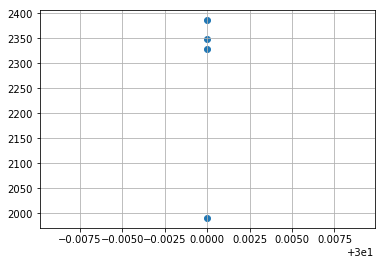

25.0 [2363.0, 2287.0, 2036.0, 1659.0]


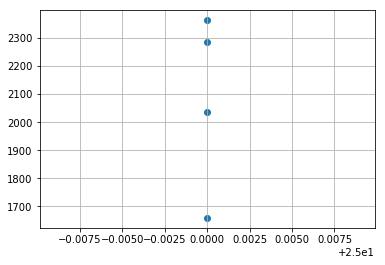

22.0 [1874.0]


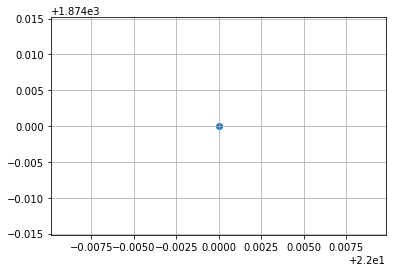

17.0 [2289.0, 2240.0, 1638.0]


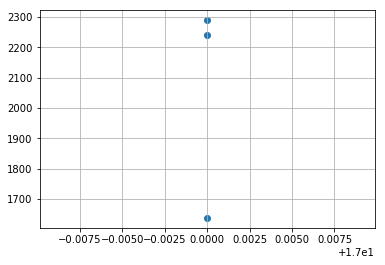

In [229]:
import matplotlib.pyplot as plt
k = 4
A = []
for key, item in sorted(data.items(), reverse=True):
    print(key, item)
    a = [key for i in range(len(item))]
    plt.scatter(a, item)
    plt.grid(True)
    plt.show()     


In [9]:
def dijkstra(graph, src, dest, path, visited, distances, predecessors):
    if src == dest:
        pred = dest
        while pred != None:
            path.insert(0, pred)
            pred = predecessors.get(pred, None)
    else:
        if not visited:
            distances[src] = 0
        for neighbor in graph[src]:
            new_distance = distances[src] + graph[src][neighbor]
            if new_distance < distances.get(neighbor, float('inf')):
                distances[neighbor] = new_distance
                predecessors[neighbor] = src
                
        visited.append(src)
        print(distances)
        unvisited = {}
        for k in graph:
            if k not in visited:
                unvisited[k] = distances.get(k, float('inf'))
        x = min(unvisited, key = unvisited.get)
        dijkstra(graph, x, dest, path, visited, distances, predecessors)

In [54]:
def get_center(G, route):
    if len(route) > 2:
        print('Yes')
        duration = []
        for i, r in enumerate(route[:len(route) -1]):
                duration.append((G[route[i]][route[i+1]]))
        hf = sum(duration) / 2
        cur = 0
        current_sum = []
        for i, d in enumerate(duration):
            cur += d
            current_sum.append(cur)
            if cur >= hf:
                if i != 0:
                    if (current_sum[i] - hf) < (hf - current_sum[i-1]):
                        return route[i+1]
                    else:
                        return route[i]
                else:
                    return route[i+1]  
    else:
        return None

In [10]:
p1 = []

dijkstra(G,'Kazan',  'Nizhniy Novgorod', p1)
p1

TypeError: dijkstra() missing 3 required positional arguments: 'visited', 'distances', and 'predecessors'

In [60]:
print(get_center(G, p1))

Yes
Nizhniy Novgorod


In [75]:
def start_v(start, end):
    distances = {}
    predecessors = {}
    visited = []
    route = []
    current_point = start
    end_point = end
    return current_point, end_point, route, visited, distances, predecessors

In [84]:
def get_route_duration(start_point, end_point):
    current_point, end, route, visited, distances, predecessors = start_v(start_point, end_point)

    dijkstra(G, current_point, end, route, visited, distances, predecessors)
    duration = []
    for i, rr in enumerate(route[:len(route)-1]):
        duration.append((G[route[i]][route[i+1]]))
    return sum(duration)

In [85]:
get_route_duration('Moscow', 'Penza')

{'Moscow': 0, 'Tver': 5.0, 'Ryazan': 5.0, 'Nizhniy Novgorod': 10.0}
{'Moscow': 0, 'Tver': 5.0, 'Ryazan': 5.0, 'Nizhniy Novgorod': 10.0, 'Saint-Petersburg': 16.0, 'Velikiy Novgorod': 12.0}
{'Moscow': 0, 'Tver': 5.0, 'Ryazan': 5.0, 'Nizhniy Novgorod': 10.0, 'Saint-Petersburg': 16.0, 'Velikiy Novgorod': 12.0, 'Penza': 13.0}
{'Moscow': 0, 'Tver': 5.0, 'Ryazan': 5.0, 'Nizhniy Novgorod': 10.0, 'Saint-Petersburg': 16.0, 'Velikiy Novgorod': 12.0, 'Penza': 13.0, 'Yoshkar-Ola': 15.0, 'Cheboksary': 15.0}
{'Moscow': 0, 'Tver': 5.0, 'Ryazan': 5.0, 'Nizhniy Novgorod': 10.0, 'Saint-Petersburg': 16.0, 'Velikiy Novgorod': 12.0, 'Penza': 13.0, 'Yoshkar-Ola': 15.0, 'Cheboksary': 15.0}


13.0

In [ ]:
def dijkstra(G, src, dest, route, visited, distances, predecessors):
    print(src, dest, route, visited, distances, predecessors)
    if src == dest:
        pred = dest
        while pred != None:
            route.insert(0, pred)
            pred = predecessors.get(pred, None)
    else:
        print(src)
        if not visited:
            distances[src] = 0
        for neighbor in G[src]:
            print(neighbor)
            print(G[src][neighbor])
            print(distances[src])
            new_distance = distances.get(src) + G[src][neighbor]
            if new_distance < distances.get(neighbor, float('inf')):
                distances[neighbor] = new_distance
                predecessors[neighbor] = src

        visited.append(src)
        unvisited = {}
        for k in G:
            if k not in visited:
                unvisited[k] = distances.get(k, float('inf'))
        x = min(unvisited, key = unvisited.get)
        dijkstra(G, x, dest, route, visited, distances, predecessors)
def start_v(start, end):
    distances = {}
    predecessors = {}
    visited = []
    route = []
    current_point = start
    end_point = end
    return current_point, end_point, route, visited, distances, predecessors

current_point, end_point, route, visited, distances, predecessors = start_v(start_point.name, end_point.name)
G = get_graph()
dijkstra(G, current_point, end_point, route, visited, distances, predecessors)

In [16]:
q = [[],[1, 2, 3],[1], [], [4,5]]
w = [item for sublist in q for item in sublist]
np.mean(w)

2.6666666666666665

In [ ]:
def dijkstra(G, src, dest, route, visited, distances, predecessors):
    print(src, dest, route, visited, distances, predecessors)
    if src == dest:
        pred = dest
        while pred != None:
            route.insert(0, pred)
            pred = predecessors.get(pred, None)
    else:
        print(src)
        if not visited:
            distances[src] = 0
        for neighbor in G[src]:
            print(neighbor)
            print(G[src][neighbor])
            print(distances[src])
            new_distance = distances.get(src) + G[src][neighbor]
            if new_distance < distances.get(neighbor, float('inf')):
                distances[neighbor] = new_distance
                predecessors[neighbor] = src

        visited.append(src)
        unvisited = {}
        for k in G:
            if k not in visited:
                unvisited[k] = distances.get(k, float('inf'))
        x = min(unvisited, key = unvisited.get)
        dijkstra(G, x, dest, route, visited, distances, predecessors)
def start_v(start, end):
    distances = {}
    predecessors = {}
    visited = []
    route = []
    current_point = start
    end_point = end
    return current_point, end_point, route, visited, distances, predecessors

current_point, end_point, route, visited, distances, predecessors = start_v(start_point.name, end_point.name)
G = get_graph()
dijkstra(G, current_point, end_point, route, visited, distances, predecessors)

In [63]:
l = ['A', 'B', 'C', 'D', 'E']
for i in range(len(l)):
    for j, k in zip(range(0,i), range(-i, 0)):
        print(l[j], l[k])
    print('-----')

-----
A E
-----
A D
B E
-----
A C
B D
C E
-----
A B
B C
C D
D E
-----


In [31]:
def dijkstra(G, src, dest, route, visited, distances, predecessors):
    print(distances)
    if src == dest:
        pred = dest
        while pred != None:
            route.insert(0, pred)
            pred = predecessors.get(pred, None)
    else:
        if not visited:
            distances[src] = 0
        for neighbor in G[src]:
            new_distance = distances[src] + G[src][neighbor]
            if new_distance < distances.get(neighbor, float('inf')):
                distances[neighbor] = new_distance
                predecessors[neighbor] = src

        visited.append(src)
        unvisited = {}
        for k in G:
            if k not in visited:
                unvisited[k] = distances.get(k, float('inf'))
        x = min(unvisited, key = unvisited.get)
        dijkstra(G, x, dest, route, visited, distances, predecessors)

def start_v(start, end):
    distances = {}
    predecessors = {}
    visited = []
    route = []
    current_point = start
    dest = end
    return current_point, dest, route, visited, distances, predecessors

In [32]:
current_point, dest, route, visited, distances, predecessors = start_v('Kazan', 'Nizhniy Novgorod')
dijkstra(G, current_point, dest, route, visited, distances, predecessors)
route

{}
{'Kazan': 0, 'Yoshkar-Ola': 6.0, 'Cheboksary': 4.0, 'Samara': 9.0, 'Orenburg': 14.0, 'Naberezhnye Chelny': 5.0, 'Perm': 13.0}
{'Kazan': 0, 'Yoshkar-Ola': 6.0, 'Cheboksary': 4.0, 'Samara': 9.0, 'Orenburg': 14.0, 'Naberezhnye Chelny': 5.0, 'Perm': 13.0, 'Nizhniy Novgorod': 9.0}
{'Kazan': 0, 'Yoshkar-Ola': 6.0, 'Cheboksary': 4.0, 'Samara': 9.0, 'Orenburg': 14.0, 'Naberezhnye Chelny': 5.0, 'Perm': 13.0, 'Nizhniy Novgorod': 9.0, 'Ufa': 11.0}
{'Kazan': 0, 'Yoshkar-Ola': 6.0, 'Cheboksary': 4.0, 'Samara': 9.0, 'Orenburg': 14.0, 'Naberezhnye Chelny': 5.0, 'Perm': 13.0, 'Nizhniy Novgorod': 9.0, 'Ufa': 11.0}


['Kazan', 'Cheboksary', 'Nizhniy Novgorod']